## Saras labb 1.1 

Import the text files

In [94]:
import numpy as np
import matplotlib.pyplot as plt


with open("pikachu.txt" , "r") as file:
    pikachu_txt = file.readlines()[1:]  # Skip the first line

with open("pichu.txt", "r") as file:
    pichu_txt = file.readlines()[1:]  # Skip the first line


Parse data

In [95]:
pichu_data = [tuple(map(float, line.strip().replace('(', '').replace(')', '').split(','))) for line in pichu_txt]
pikachu_data = [tuple(map(float, line.strip().replace('(', '').replace(')', '').split(','))) for line in pikachu_txt]

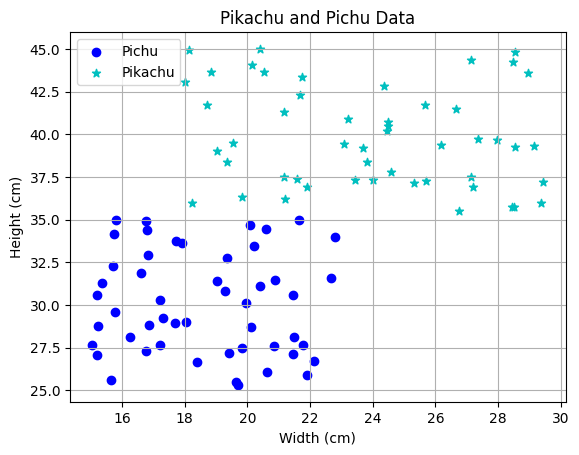

In [96]:
# separate x and y values
pichu_x = [point[0] for point in pichu_data]
pichu_y = [point[1] for point in pichu_data]

pikachu_x = [point[0] for point in pikachu_data]
pikachu_y = [point[1] for point in pikachu_data]

# Plot Pichu data
plt.scatter(pichu_x, pichu_y, color='b', marker='o',label='Pichu')
plt.scatter(pikachu_x, pikachu_y, color='c', marker='*', label='Pikachu')

plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Pikachu and Pichu Data')
plt.legend()
plt.grid(True)

plt.show()



Read the file test data

In [97]:
# Load test points from file
with open("test_points.txt", "r") as file:
    test_points_txt = file.readlines()

# # Convert each row to a tuple of floats and create test_data
test_data = [tuple(map(float, line.strip().replace('(', '').replace(')', '').split(','))) for line in test_points_txt]

# Print test_data for checking
print(test_data)

[(25.0, 35.0, 15.0, 14.0, 26.0, 30.0, 22.0, 45.0)]


Distance between test point 1 and Pikachu 1: 12.09
Distance between test point 1 and Pikachu 2: 6.70
Distance between test point 1 and Pikachu 3: 4.54
Distance between test point 1 and Pikachu 4: 5.21
Distance between test point 1 and Pikachu 5: 3.99
Distance between test point 1 and Pikachu 6: 2.35
Distance between test point 1 and Pikachu 7: 6.59
Distance between test point 1 and Pikachu 8: 6.15
Distance between test point 1 and Pikachu 9: 2.78
Distance between test point 1 and Pikachu 10: 4.96
Distance between test point 1 and Pikachu 11: 3.58
Distance between test point 1 and Pikachu 12: 7.39
Distance between test point 1 and Pikachu 13: 2.50
Distance between test point 1 and Pikachu 14: 10.27
Distance between test point 1 and Pikachu 15: 9.46
Distance between test point 1 and Pikachu 16: 3.52
Distance between test point 1 and Pikachu 17: 4.17
Distance between test point 1 and Pikachu 18: 6.72
Distance between test point 1 and Pikachu 19: 2.16
Distance between test point 1 and Pika

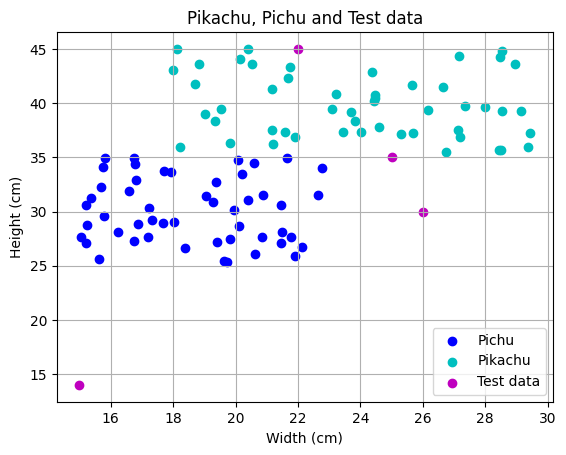

In [107]:
# Function to calculate Euclidean distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Function to calculate the distance between the test points and Pikachu/Pichu points
def calculate_distances(test_data, pikachu_data, pichu_data):
    distances = []
    for test_point in test_data:
        test_distances_pikachu = []
        test_distances_pichu = []
        for pikachu_point in pikachu_data:
            distance = euclidean_distance(test_point, pikachu_point)
            test_distances_pikachu.append(distance)
        for pichu_point in pichu_data:
            distance = euclidean_distance(test_point, pichu_point)
            test_distances_pichu.append(distance)
        distances.append((test_distances_pikachu, test_distances_pichu))
    return distances

# Calculate distance between Pikachu and Pichu
distances = calculate_distances(test_data, pikachu_data, pichu_data)

# Print the distances
for i, (pikachu_distances, pichu_distances) in enumerate(distances):
    for j, distance in enumerate(pikachu_distances):
        print(f"Distance between test point {i+1} and Pikachu {j+1}: {distance:.2f}")
    for j, distance in enumerate(pichu_distances):
        print(f"Distance between test point {i+1} and Pichu {j+1}: {distance:.2f}")

# # Plot Pichu Pikachu and test data points
pichu_x = [point[0] for point in pichu_data]
pichu_y = [point[1] for point in pichu_data]
pikachu_x = [point[0] for point in pikachu_data]
pikachu_y = [point[1] for point in pikachu_data]
test_data_x = [point[0] for point in test_data]
test_data_y = [point[1] for point in test_data]

plt.scatter(pichu_x, pichu_y, color='b', label='Pichu')
plt.scatter(pikachu_x, pikachu_y, color='c', label='Pikachu')
plt.scatter(test_data_x, test_data_y, color='m', label='Test data')

plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Pikachu, Pichu and Test data')
plt.legend()
plt.grid(True)
plt.show()


Decision tree classifier

Tests the test data if it should be classified as Pichu or Pikachu

In [110]:
# Calculate and classify test points
classifications = []
for pikachu_distances, pichu_distances in distances:
    min_pikachu_distance = min(pikachu_distances)
    min_pichu_distance = min(pichu_distances)
    
    if min_pichu_distance < min_pikachu_distance:
        classifications.append("Pichu")
    else:
        classifications.append("Pikachu")

# Print classifications for the test points
for i, classification in enumerate(classifications):
    print(f"Test point {i+1} classified as: {classification}")


Test point 1 classified as: Pikachu
Test point 2 classified as: Pichu
Test point 3 classified as: Pichu
Test point 4 classified as: Pikachu
